In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 25

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 0) 0.5965985389678041 0.6526727600000015 [-177.54279144 -302.48703582 -276.29784343]
(0, 1) 2.772825400301201 49.20810249 [ 1118.97110698 12568.85252117 13845.2543586 ]
(0, 2) 0.36082959450339014 -0.030442469999997 [ 353.15044674 -527.2346721  -319.18745761]
(0, 3) 0.5100310933066706 -0.3794175800000019 [ 124.49601208 -200.01554079 -325.33526265]
(0, 4) 0.37366627562140337 -0.555657090000004 [ 575.35241927 -581.28391099  -17.42447534]
(0, 5) 0.5696972008635235 -0.6355467799999985 [ 164.7354668 -364.5004463   59.1981165]
(0, 6) 3.822232684611545 18.013061769999997 [ 3993.27980446 22978.34463678 24711.55626937]
(0, 7) 0.27413488409560216 -0.10347627000000159 [-50.21052283  57.6029257  111.29623004]
(0, 8) 0.6194019314496786 -0.18646061000000458 [-383.60427117  -78.87266502  855.85214152]
(1, 0) 0.28832993515965866 -0.29484641999999894 [   5.76904001 -307.31633233   97.23170404]
(1, 1) 0.5132446021452581 -0.5162617499999982 [ -13.89787064  271.36829756 -175.78749826]
(1, 2) 0.20164138

(9, 7) 0.4267444593948617 -0.10752974000000393 [-233.38859211   16.36316137  167.7128691 ]
(9, 8) 0.3249476484677291 0.06742141000000146 [-253.37652363 -155.92503067  698.97172848]
(9, 9) 0.2356178136334378 0.1005132199999963 [-260.49731257  371.37962207  235.53561184]
(10, 0) 0.4073849144892689 -0.24978416000000436 [ 482.72361134 -193.03512326 -222.4739599 ]
(10, 1) 0.3338581184268032 -0.07729494000000159 [ 89.83132236 239.29819819 133.24347302]
(10, 2) 0.276207262905117 0.23719076000000427 [-343.56841883  267.46932578  -24.4400523 ]
(10, 5) 0.7301934052296843 -0.16202921000000003 [ 157.26296022 -105.50890608 -259.86134015]
(10, 6) 0.33655182270649825 -0.2881033999999971 [ 177.3734993  -188.16955238  259.65698748]
(10, 7) 0.31036732309520626 -0.27501701999999995 [ 192.47950029 -130.54039819    8.08838971]
(10, 8) 0.587388955001287 -0.46234819000000016 [  22.0343174  -155.62731857  -55.32198814]
(10, 9) 0.3652084311825792 -0.7691836700000039 [1186.01836931  166.38638331 -841.55625473]


(21, 0) 0.39017637620656465 -0.046511719999998036 [-139.53032456  -62.3682514   311.55271615]
(21, 1) 0.43222381225642564 -0.18087279999999595 [114.58171554 -41.43916713 185.05207528]
(21, 2) 0.38443189339901856 -0.35180830000000185 [ 297.79630552 -100.62927962  -62.43605601]
(21, 3) 0.3173947105914827 -0.001418350000001567 [ 38.84237053  -2.29508642 -42.89510212]
(21, 4) 0.44922057623487677 0.12914640000000333 [-303.87269601  294.69789519  394.08257384]
(21, 5) 0.05668618252003906 0.018831590000004894 [108.06916097 -53.06148727 -22.35381351]
(21, 6) 0.09137208069591773 0.0005416299999936314 [ 26.44154413  -9.86776162 -20.08707834]
(21, 7) 0.22953602382117372 -0.5044435000000007 [ 997.11127027  182.60221567 -839.71578414]
(21, 8) 0.32158381318975315 -0.5471276399999994 [ 413.80075044 -503.52863332   29.09920612]
(21, 9) 0.26188759400454276 -0.12557378999999713 [-228.44139243   -8.65632972 -110.21787496]
(22, 0) 0.178628672307348 -0.45436879999999746 [ 276.0597274   268.40679529 -136.21

In [6]:
filename="clus_Ni6Pd4_modified.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[37, 7, 27, 67, 21, 33, 13, 30, 47, 11]
[28, 40, 11, 31, 24, 27, 44, 25, 25, 42]
[23, 18, 13, 38, 12, 30, 35, 41, 33, 21]
[33, 28, 18, 49, 30, 30, 17, 27, 24, 22]
[21, 26, 30, 34, 39, 29, 32, 34, 27, 34]
[19, 22, 24, 47, 28, 28, 52, 54, 21, 24]
[29, 29, 14, 12, 21, 35, 22, 42, 24, 33]
[40, 29, 37, 33, 26, 22, 26, 33, 46, 21]
[39, 17, 23, 30, 43, 30, 16, 29, 32, 24]
[26, 36, 23, 33, 41, 21, 21, 28, 33, 19]
[29, 30, 30, 19, 18, 41, 32, 29, 31, 13]
[30, 21, 30, 31, 24, 41, 34, 26, 36, 23]
[45, 28, 14, 18, 22, 27, 24, 17, 22, 21]
[4, 39, 30, 34, 28, 34, 35, 36, 52, 27]
[10, 30, 28, 23, 39, 28, 38, 37, 21, 30]
[32, 36, 22, 28, 36, 28, 6, 27, 35]
[4, 16, 35, 28, 30, 18, 16, 34, 48, 32]
[21, 39, 24, 49, 28, 31, 29, 11, 38, 47]
[32, 32, 28, 36, 30, 25, 37, 16, 35, 13]
[7, 52, 24, 37, 25, 42, 21, 4, 19, 24]
[26, 32, 24, 23, 18, 26, 25, 7, 17, 27]
[40, 41, 24, 33, 31, 27, 27, 18, 42, 29]
[7, 21, 35, 26, 25, 31, 32, 19, 41, 21]
[51, 35, 30, 23, 37, 49, 23, 24, 25, 32]
[39, 33, 27, 29, 26, 24, 37,

In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[37, 7, 27, 67, 21, 33, 13, 30, 47, 11], [28, 40, 11, 31, 24, 27, 44, 25, 25, 42], [23, 18, 13, 38, 12, 30, 35, 41, 33, 21], [33, 28, 18, 49, 30, 30, 17, 27, 24, 22], [21, 26, 30, 34, 39, 29, 32, 34, 27, 34], [19, 22, 24, 47, 28, 28, 52, 54, 21, 24], [29, 29, 14, 12, 21, 35, 22, 42, 24, 33], [40, 29, 37, 33, 26, 22, 26, 33, 46, 21], [39, 17, 23, 30, 43, 30, 16, 29, 32, 24], [26, 36, 23, 33, 41, 21, 21, 28, 33, 19], [29, 30, 30, 19, 18, 41, 32, 29, 31, 13], [30, 21, 30, 31, 24, 41, 34, 26, 36, 23], [45, 28, 14, 18, 22, 27, 24, 17, 22, 21], [4, 39, 30, 34, 28, 34, 35, 36, 52, 27], [10, 30, 28, 23, 39, 28, 38, 37, 21, 30], [32, 36, 22, 28, 36, 28, 6, 27, 35], [4, 16, 35, 28, 30, 18, 16, 34, 48, 32], [21, 39, 24, 49, 28, 31, 29, 11, 38, 47], [32, 32, 28, 36, 30, 25, 37, 16, 35, 13], [7, 52, 24, 37, 25, 42, 21, 4, 19, 24], [26, 32, 24, 23, 18, 26, 25, 7, 17, 27], [40, 41, 24, 33, 31, 27, 27, 18, 42, 29], [7, 21, 35, 26, 25, 31, 32, 19, 41, 21], [51, 35, 30, 23, 37, 49, 23, 24, 25, 32], [39

In [8]:
print(len(similar_clus))
print(similar_clus)

21
[(0, 9), (2, 1), (5, 0), (6, 1), (6, 2), (7, 9), (10, 3), (10, 4), (11, 3), (12, 7), (12, 8), (13, 0), (14, 8), (16, 0), (16, 5), (16, 6), (18, 2), (19, 0), (19, 7), (22, 2), (22, 9)]


In [9]:
file_vasp="results.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[79, 19, 17, 18, 13, 21, 13, 69, 71, 19, 10, 17, 17, 41, 28, 23, 13, 41, 99, 22, 19, 15, 17, 36, 25, 13, 19, 13, 33, 13, 17, 23, 11, 63, 31, 18, 25, 19, 15, 17, 54, 81, 21, 21, 112, 15, 12, 17, 29, 27, 39, 21, 19, 74, 29, 52, 13, 37, 27, 17, 25, 21, 17, 12, 52, 52, 17, 19, 17, 54, 42, 40, 34, 15, 56, 19, 17, 11, 30, 15, 31, 68, 48, 27, 23, 19, 17, 15, 18, 23, 22, 26, 49, 55, 21, 19, 19, 52, 67, 34, 19, 9, 27, 47, 18, 13, 20, 33, 15, 29, 27, 17, 73, 58, 15, 69, 54, 90, 21, 19, 87, 11, 51, 19, 55, 80, 26, 15, 15, 17, 5, 17, 19, 79, 19, 17, 91, 63, 55, 38, 18, 27, 16, 55, 21, 35, 17, 111, 15, 49, 5, 71, 19, 19, 45, 15, 9, 13, 61, 78, 5, 25, 18, 21, 15, 19, 27, 112, 18, 22, 15, 55, 36, 19, 23, 19, 17, 11, 19, 17, 117, 12, 79, 13, 15, 19, 17, 25, 29, 15, 10, 13, 19, 19, 19, 15, 19, 5, 34, 17, 22, 17, 19, 21, 52, 13, 58, 21, 60, 13, 93, 31, 15, 52, 45, 34, 51, 15, 18, 19, 16, 13, 40, 62, 23, 15, 21, 21, 59, 40, 99, 66, 18, 70, 13, 29, 17, 21, 15, 97, 15, 50, 19, 17, 22, 17, 73, 44, 55]


[[7

In [10]:
print(new_vasp_calls)

[[37, 7, 27, 67, 21, 33, 13, 30, 47, 11], [28, 40, 11, 31, 24, 27, 44, 25, 25, 42], [23, 18, 13, 38, 12, 30, 35, 41, 33, 21], [33, 28, 18, 49, 30, 30, 17, 27, 24, 22], [21, 26, 30, 34, 39, 29, 32, 34, 27, 34], [19, 22, 24, 47, 28, 28, 52, 54, 21, 24], [29, 29, 14, 12, 21, 35, 22, 42, 24, 33], [40, 29, 37, 33, 26, 22, 26, 33, 46, 21], [39, 17, 23, 30, 43, 30, 16, 29, 32, 24], [26, 36, 23, 33, 41, 21, 21, 28, 33, 19], [29, 30, 30, 19, 18, 41, 32, 29, 31, 13], [30, 21, 30, 31, 24, 41, 34, 26, 36, 23], [45, 28, 14, 18, 22, 27, 24, 17, 22, 21], [4, 39, 30, 34, 28, 34, 35, 36, 52, 27], [10, 30, 28, 23, 39, 28, 38, 37, 21, 30], [32, 36, 22, 28, 36, 28, 6, 27, 35], [4, 16, 35, 28, 30, 18, 16, 34, 48, 32], [21, 39, 24, 49, 28, 31, 29, 11, 38, 47], [32, 32, 28, 36, 30, 25, 37, 16, 35, 13], [7, 52, 24, 37, 25, 42, 21, 4, 19, 24], [26, 32, 24, 23, 18, 26, 25, 7, 17, 27], [40, 41, 24, 33, 31, 27, 27, 18, 42, 29], [7, 21, 35, 26, 25, 31, 32, 19, 41, 21], [51, 35, 30, 23, 37, 49, 23, 24, 25, 32], [39

In [11]:
print(similar_clus)

[(0, 9), (2, 1), (5, 0), (6, 1), (6, 2), (7, 9), (10, 3), (10, 4), (11, 3), (12, 7), (12, 8), (13, 0), (14, 8), (16, 0), (16, 5), (16, 6), (18, 2), (19, 0), (19, 7), (22, 2), (22, 9)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[11, 18, 19, 29, 14, 21, 19, 18, 31, 17, 22, 4, 21, 4, 18, 16, 28, 7, 4, 35, 21]
377
[19, 15, 39, 21, 17, 15, 47, 18, 58, 15, 15, 5, 15, 5, 19, 27, 79, 10, 5, 40, 40]
524
[8, -3, 20, -8, 3, -6, 28, 0, 27, -2, -7, 1, -6, 1, 1, 11, 51, 3, 1, 5, 19]
147
21


(0.0, 0.025)

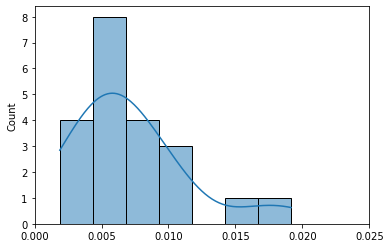

In [13]:
import seaborn as sns
g = sns.histplot(similar_clus_diff_dist, kde=True)
g.set_xlim(0.0, 0.025)

<AxesSubplot:ylabel='Count'>

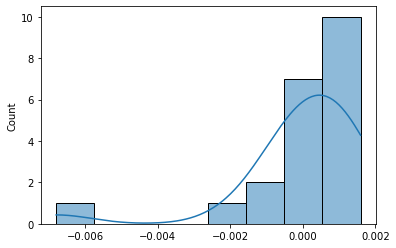

In [14]:
sns.histplot(similar_clus_ene_list, kde=True)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.0067987999999985504, -0.0018141600000021185, -0.0010513300000027925, -0.0005506099999976755, -0.00046470000000198297, -0.00044317000000404505, -0.00032743999999951257, -0.000312640000004194, -5.982999999787353e-05, 9.914999999693919e-05, 0.0003492899999955057, 0.0005834299999989412, 0.000771419999999523, 0.0007795599999980141, 0.0008760600000030649, 0.0010078000000035559, 0.0011253599999960784, 0.0011570200000008413, 0.0012871000000060917, 0.0015274000000005117, 0.0015901300000038532]


In [16]:
print(sorted(similar_clus_diff_dist))

[0.0018854117725096752, 0.001971395423555453, 0.0019746101016246877, 0.0032712795298961163, 0.00437339643333873, 0.004657736694904724, 0.00507730374118208, 0.005186169023048137, 0.005681703796693105, 0.005795692739066807, 0.005802748133985283, 0.00647197103432764, 0.007198252341079803, 0.007601236854339603, 0.007945019621948149, 0.008558424999489419, 0.009925236847940689, 0.010292223318507822, 0.010929146637649465, 0.016439404305695317, 0.01915685941990801]


In [17]:
import pickle
with open ('Ni6Pd4_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Ni6Pd4_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)